In [1]:
#import some imprtant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#load the data
df = pd.read_csv("IEA Global EV Data 2024.csv")
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


In [2]:
df.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [3]:
# Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [4]:
#checking nul value if any
df.isnull(). sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [5]:
# # Drop rows with missing values (if any)
df.dropna(inplace = True)

In [6]:
# EDA (Convert 'year' to datetime format)
df['year'] = pd.to_datetime(df['year'], format='%Y')

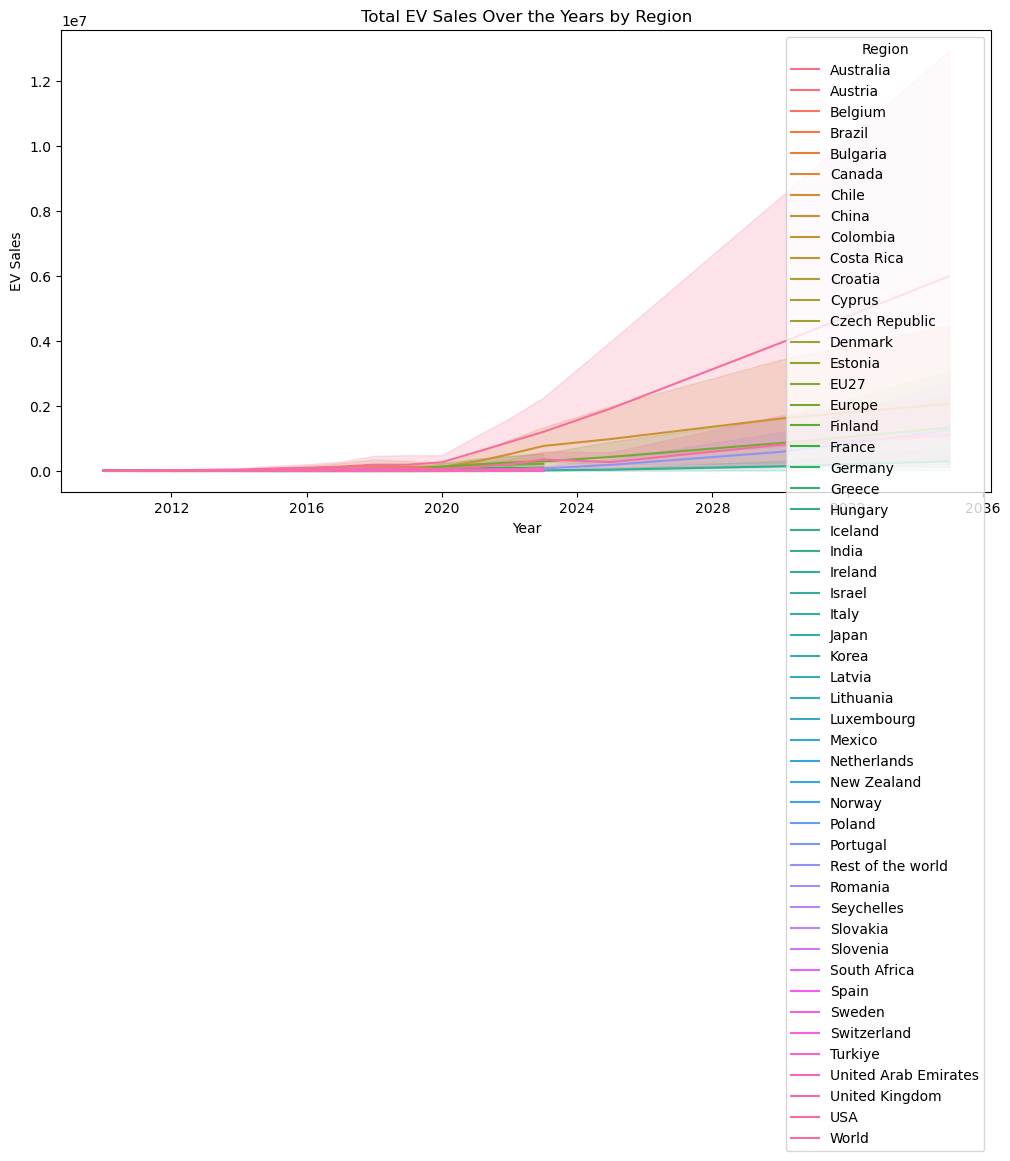

In [7]:
# # Plot the total EV sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['parameter'] == 'EV sales'], x='year', y='value', hue='region')
plt.title('Total EV Sales Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend(title='Region')
plt.show()

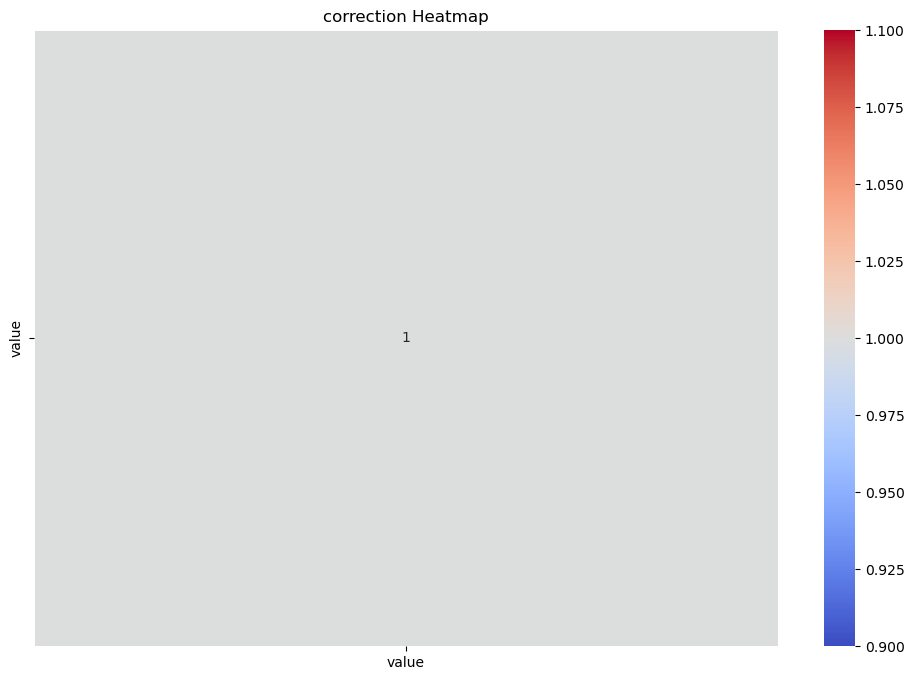

In [8]:
# # Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include = [np.number])

#  Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True , cmap = 'coolwarm', linewidths=0.5)
plt.title('correction Heatmap')
plt.show()

In [9]:
# Predictive Analysis
# Given the data, it would be interesting to predict future EV sales based on historical data.
# Filter the data for EV sales
ev_sales_df = df[df['parameter'] == 'EV sales']

# Prepare the data for modeling
x = ev_sales_df[['year']]
y =ev_sales_df['value']

In [10]:
# Convert 'year' to numerical format for modeling
x['year'] = x['year'].dt.year


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_8408\2623948326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['year'] = x['year'].dt.year


In [11]:
# # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [12]:
# Initialize and train the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
# Making predictions
y_pred = model.predict(x_test)

In [14]:
# # Evaluating the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse , r2

(987575240715.1104, -0.02031324339030749)